# 24/11/2021
# EDA:-Exloratory Data Analysis and Preprocessing

In [1]:
#To clean data before feed the data in computer
#1.Handle missing value
#2.Handling outliers
#3.Handling skewness
#4.Handling categorical data
#5.Features engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

# Handling Missing values

In [3]:
#To generate null values
np.nan

nan

In [4]:
#Create a dataframe from dictionary
name=["kamal","john","renu","sunita","aniket"]
math=[78,87,67,np.nan,85]
science=[78,75,np.nan,np.nan,76]
#Create a dictionary with help of list
dic={"name":name,"math":math,"science":science}
dic

{'name': ['kamal', 'john', 'renu', 'sunita', 'aniket'],
 'math': [78, 87, 67, nan, 85],
 'science': [78, 75, nan, nan, 76]}

In [5]:
#Create a DataFrame from dictionary
df=pd.DataFrame(dic)
df

,name,math,science
0,kamal,78.0,78.0
1,john,87.0,75.0
2,renu,67.0,NaN
3,sunita,NaN,NaN
4,aniket,85.0,76.0


In [6]:
#To check null values if existing DataFrame df:use inbuilt method isnull()
df.isnull() #Null values returns in True and not null in false

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [7]:
df.isnull().sum() #To find null values in each column

name       0
math       1
science    2
dtype: int64

In [8]:
#Dropna() It will delete the values which are null from row and column 
df.dropna() #By default it will take axis=0 means top to bottom

,name,math,science
0,kamal,78.0,78.0
1,john,87.0,75.0
4,aniket,85.0,76.0


In [9]:
#To delete column whose values are null but remove for temporary 
df.dropna(axis=1)

,name
0,kamal
1,john
2,renu
3,sunita
4,aniket


In [10]:
df

,name,math,science
0,kamal,78.0,78.0
1,john,87.0,75.0
2,renu,67.0,NaN
3,sunita,NaN,NaN
4,aniket,85.0,76.0


In [11]:
#To delete 4th row because its has maximum null values in thos row
df.drop([3,2]) #DataFrame.drop(rowindex)

,name,math,science
0,kamal,78.0,78.0
1,john,87.0,75.0
4,aniket,85.0,76.0


In [12]:
#To remove science column because it contains maximum null values but temporary
df.drop(["science"],axis=1)

,name,math
0,kamal,78.0
1,john,87.0
2,renu,67.0
3,sunita,NaN
4,aniket,85.0


In [13]:
df

,name,math,science
0,kamal,78.0,78.0
1,john,87.0,75.0
2,renu,67.0,NaN
3,sunita,NaN,NaN
4,aniket,85.0,76.0


In [14]:
#How many rows and column in dataset:use shape:return ans in tuple
#Tuple(no.of rows,no.of column)
df.shape

(5, 3)

In [15]:
#How many rows in dataset
df.shape[0]

5

In [16]:
#How many column in dataset
df.shape[1]

3

In [17]:
#Find the percentage of null values in column if percent is more then 40%
#df.isnull().sum()/no.of rows*100
df.isnull().sum()/df.shape[0]*100

name        0.0
math       20.0
science    40.0
dtype: float64

In [18]:
# Replacing null values replace means fill all null values with any numbers for eg:- we take 0
df.fillna(0)

,name,math,science
0,kamal,78.0,78.0
1,john,87.0,75.0
2,renu,67.0,0.0
3,sunita,0.0,0.0
4,aniket,85.0,76.0


In [19]:
#Replace null values of math column with avg(mean) of math permanently 
#First find mean of math column
m=df["math"].mean() #Mean() inbuilt function
print("mean of math",m)
df["math"].fillna(m,inplace=True) # Inplace=True means fill values permanently

mean of math 79.25


In [20]:
df

,name,math,science
0,kamal,78.00,78.0
1,john,87.00,75.0
2,renu,67.00,NaN
3,sunita,79.25,NaN
4,aniket,85.00,76.0


In [21]:
s=round(df["science"].mean(),2) #with the help of round we can remove extra decimal values
print("mean of science",s)
df["science"].fillna(s,inplace=True)

mean of science 76.33


In [22]:
df

,name,math,science
0,kamal,78.00,78.00
1,john,87.00,75.00
2,renu,67.00,76.33
3,sunita,79.25,76.33
4,aniket,85.00,76.00


In [23]:
#Work on real dataset Automobile_data.csv to load data
car=pd.read_csv("Automobile_data.csv")
car

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [24]:
car.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [25]:
car.tail()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470
204,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,19,25,22625


In [26]:
car.shape

(205, 15)

In [27]:
#To check missing values in dataset
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [29]:
car["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [30]:
#For iterable object
for data in car["horsepower"]:
    if not(str(data).isnumeric()):
        print(data)

?
?


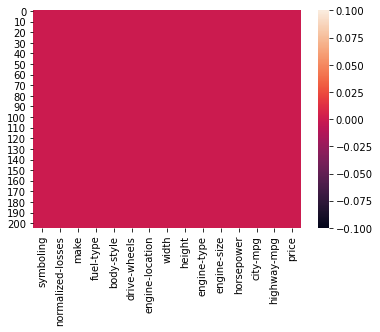

In [31]:
#To show the null values in car[pink means there is no null values]
sb.heatmap(car.isnull())
plt.show()

In [32]:
car["horsepower"].replace("?",np.nan,inplace=True) #Replace by default it is axis=0

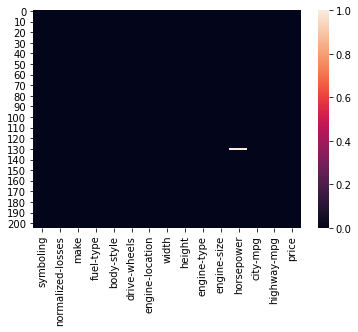

In [33]:
#The vaules in white is null
sb.heatmap(car.isnull())
plt.show()

In [34]:
car["normalized-losses"].replace("?",np.nan,inplace=True)

<AxesSubplot:>

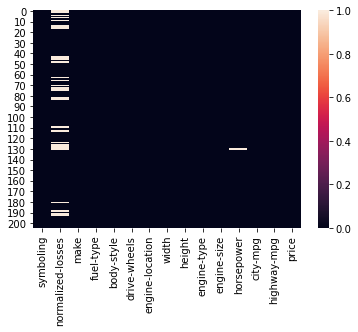

In [35]:
sb.heatmap(car.isnull())

# 25/11/2021

In [36]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [37]:
#To find particular datatype
car["horsepower"].dtype #In output o means object

dtype('O')

In [38]:
#To change the datatype we use astype("float")
car["horsepower"]=car["horsepower"].astype("float")

In [39]:
car["horsepower"].dtype

dtype('float64')

In [40]:
#To find the % of null values in horsepower column
car["horsepower"].isnull().sum()*100/car.shape[0]

0.975609756097561

In [41]:
#To replace null values of horsepower column with mean of horsepower column permanently
#find the mean/avg of horsepower column
m=car["horsepower"].mean()
car["horsepower"].fillna(m,inplace=True)

In [42]:
#To check null values
# isnull detect only numeric value and not special expression like ?
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [43]:
car["normalized-losses"].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [44]:
#for iterable object to check the number of ? in dataset
for data in car["normalized-losses"]:
    if not(str(data).isnumeric()):
        print(data)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


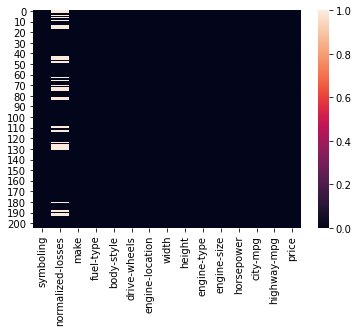

In [45]:
sb.heatmap(car.isnull())
plt.show()

In [46]:
car["normalized-losses"]=car["normalized-losses"].astype("float")

In [47]:
car["normalized-losses"].dtype

dtype('float64')

In [48]:
#find the % of null values in normalized-losses
car["normalized-losses"].isnull().sum()*100/car.shape[0]

20.0

In [49]:
# To replace null values of normalized-losses column with mean of normalized-losses column permanently
#Find the mean/avg of normalized-losses
m=car["normalized-losses"].mean()
car["normalized-losses"].fillna(m,inplace=True)

In [50]:
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [51]:
columns=car.columns
columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [52]:
#To find column with there values
for col in columns:
    print(col)
    print(car[col].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized-losses
[122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
width
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 

# HANDLING OUTLIERS

In [53]:
#outliers is an extremely high or low data value when compared with the rest of the value
#EG:-[9,9,10,10,10,11,12,36]
l=[9,9,10,10,10,11,12,36]
print(l)

[9, 9, 10, 10, 10, 11, 12, 36]


In [54]:
df=pd.Series(l)
df

0     9
1     9
2    10
3    10
4    10
5    11
6    12
7    36
dtype: int64

In [55]:
#Find outliers
Q1=df.quantile(0.25) #First quantile:25% means(N+1)*25% the term
Q3=df.quantile(0.75) #Third quantile:75% means(N+1)*75%
#Find inter quantile range
IQR=Q3-Q1 #inter quantile range
print("first quantile:",Q1)
print("third quantile:",Q3)
print("inter quantile range:",IQR)
Lower_whisker=Q1-1.5*IQR
Upper_whisker=Q3-1.5*IQR
print("Lower whisker:",Lower_whisker,"\n Upper whisker:",Upper_whisker)

first quantile: 9.75
third quantile: 11.25
inter quantile range: 1.5
Lower whisker: 7.5 
 Upper whisker: 9.0


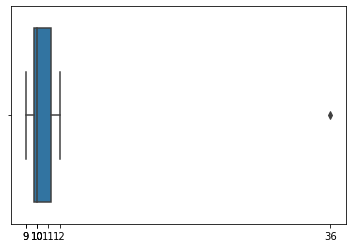

In [56]:
sb.boxplot(data=df,x=df)
plt.xticks(df)
plt.show()

In [57]:
#Access those record is >12
df[df>12]

7    36
dtype: int64

In [58]:
#To delete record no7 which is outlier
df.drop(7,inplace=True)

In [59]:
df

0     9
1     9
2    10
3    10
4    10
5    11
6    12
dtype: int64

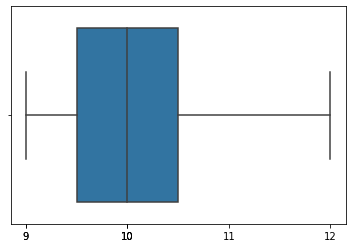

In [60]:
#After delete a outlier
sb.boxplot(data=df,x=df)
plt.xticks(df)
plt.show()

In [61]:
#WE check outlier target variable means output variable(numerical type)
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

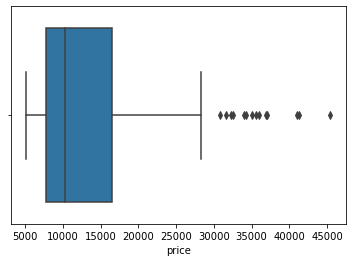

In [62]:
#Price is a target variable means output
#WITHOUT USING OF Y=AXIS
sb.boxplot(data=car,x="price")
plt.show()

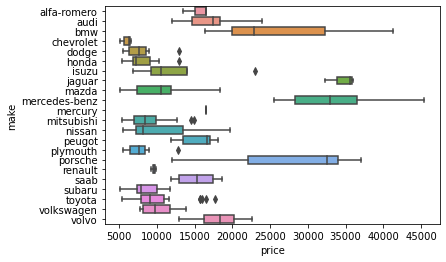

In [63]:
#WITH USING OF Y=AXIS
sb.boxplot(data=car,x="price",y="make")
plt.show()

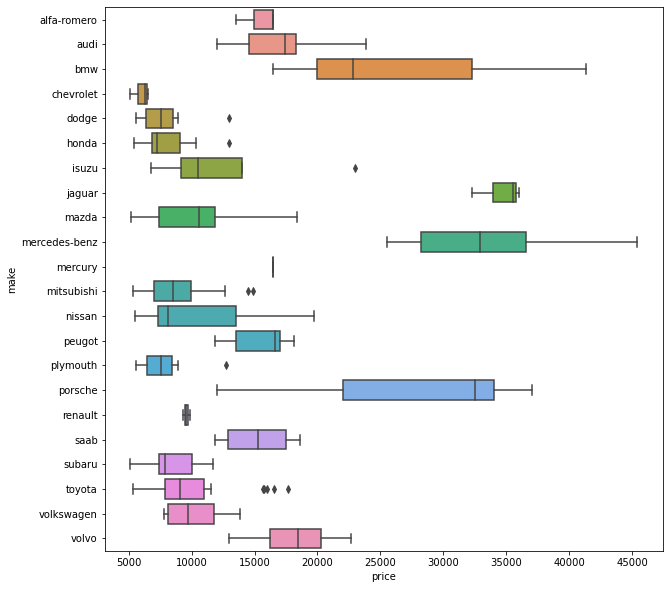

In [64]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

In [65]:
#With the help of this we can find total details of isuzu
car[(car["make"]=="isuzu") & (car["price"]>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [66]:
#with this we can remove(drop) outliers
car.drop(45,inplace=True)

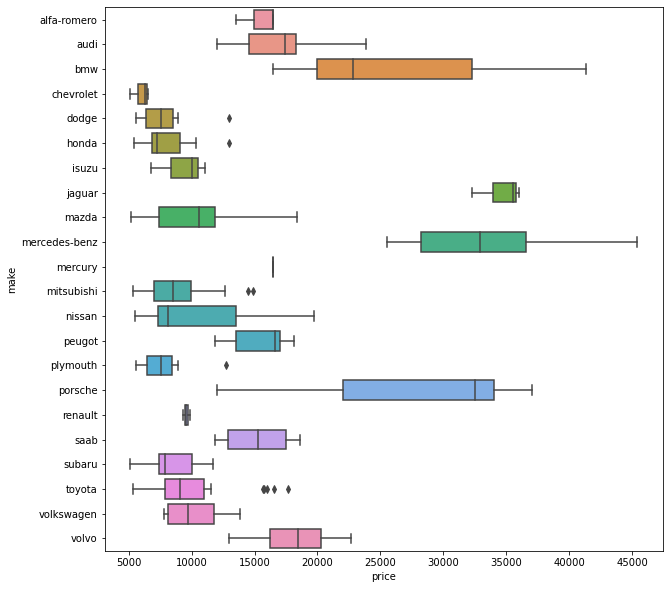

In [67]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

In [68]:
car[(car["make"]=="plymouth") & (car["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [69]:
car.drop(124,inplace=True)

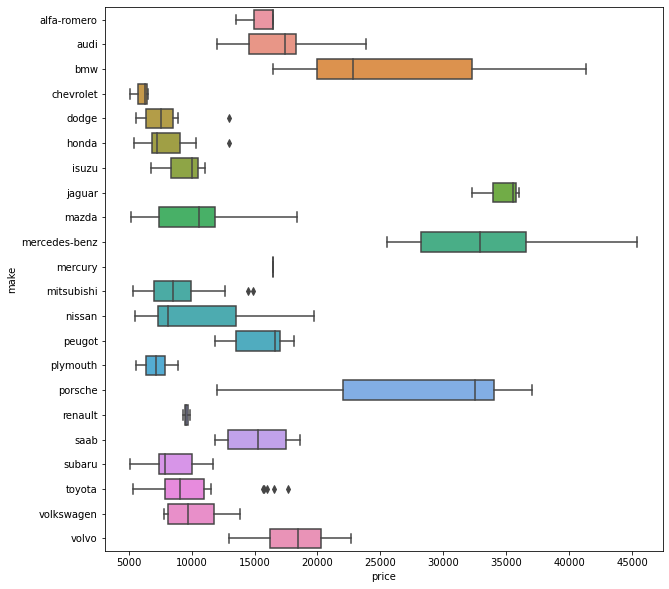

In [70]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

In [71]:
car[(car["make"]=="dodge") & (car["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [72]:
car.drop(29,inplace=True)

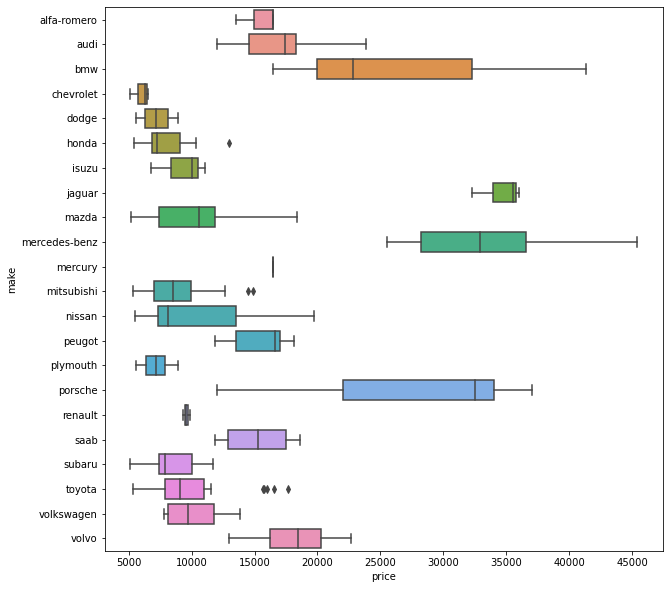

In [73]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

In [74]:
car[(car["make"]=="mitsubishi") & (car["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
82,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12629
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [75]:
car.drop([82,83,84],inplace=True)

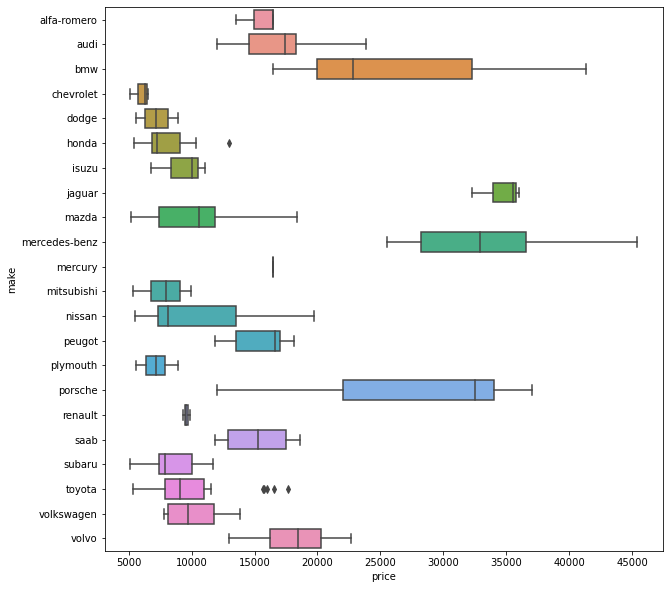

In [76]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

In [77]:
car[(car["make"]=="honda") & (car["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
40,0,85.0,honda,gas,sedan,fwd,front,62.5,54.1,ohc,110,86.0,27,33,10295
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945
42,1,107.0,honda,gas,sedan,fwd,front,66.0,51.0,ohc,110,100.0,25,31,10345


In [78]:
car.drop([40,41,42],inplace=True)

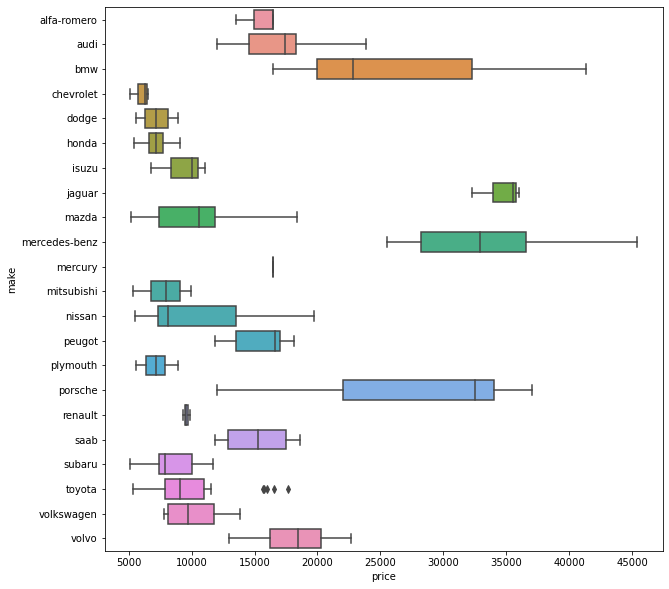

In [79]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

In [80]:
car[(car["make"]=="toyota") & (car["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [81]:
car.drop([172,178,179,180,181],inplace=True)

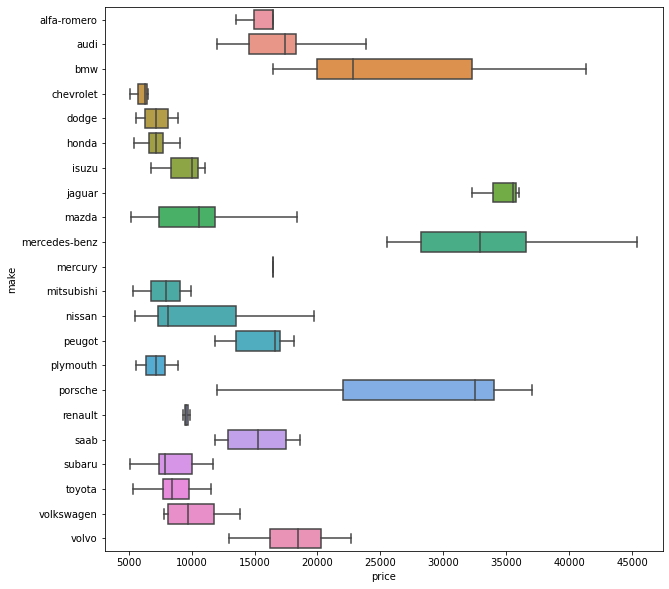

In [82]:
plt.figure(figsize=(10,10))
sb.boxplot(data=car,x="price",y="make")
plt.show()

# 29/11/2021

In [83]:
#There are 2 types of method use to converts categorical data into 
#numerical type
#1. One Hot Encoding           2. Label Encoding
#3. Handling Categorical Data : -
#Categorical data means Non-Numerical data means object type data means string 
#type.
'''Machine already understand only numerical data , not understand categorical
Data means Non-numeric data  means string type means object type
Now We converts categorical Data to Numerical Data .How do this'''

'Machine already understand only numerical data , not understand categorical\nData means Non-numeric data  means string type means object type\nNow We converts categorical Data to Numerical Data .How do this'

In [84]:
#One Hot coding
#Apply one Hot coding on fuel-type column:-temporary change
#Get_dummies() inbuilt method of pandas
pd.get_dummies(car["fuel-type"]) #Convert value of fuel-type from object to numeric type but temporary

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [85]:
car["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [86]:
#Use 2. LabelEncoder inbuilt class from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# from filename.classname import classname

In [87]:
#Create object of LabelEncoder class
le=LabelEncoder()
le.fit_transform(car["fuel-type"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [88]:
le=LabelEncoder()
le.fit_transform(car["make"])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21])

In [89]:
car["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [90]:
#Separate the numerical data(int and float) and categorical data(object)
#First create DataFrame name car_cat which hold object type data means categorical data
#select dtypes()
car_cat=car.select_dtypes(object)
#here car_cat is a new dataframe for categorical type data
car_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             191 non-null    object
 1   fuel-type        191 non-null    object
 2   body-style       191 non-null    object
 3   drive-wheels     191 non-null    object
 4   engine-location  191 non-null    object
 5   engine-type      191 non-null    object
dtypes: object(6)
memory usage: 14.5+ KB


In [91]:
#Then create a second data frame name car_num
#Which hold int and float type data means numerical data
car_num=car.select_dtypes(['int64','float64'])
car_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   width              191 non-null    float64
 3   height             191 non-null    float64
 4   engine-size        191 non-null    int64  
 5   horsepower         191 non-null    float64
 6   city-mpg           191 non-null    int64  
 7   highway-mpg        191 non-null    int64  
 8   price              191 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 19.0 KB


In [92]:
car_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [93]:
#here all categorical type data converts into numeric type
for col in car_cat:
    #create object of LabelEncoder class
    le=LabelEncoder()
    car_cat[col]=le.fit_transform(car_cat[col]) #car_cat is used for permanent 

In [94]:
car_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [95]:
#Normal Distribution means  data are Equally distributed on both sides
#Normal Distribution curve is apply only numeric type data
#Normal Distribution is also a frequency curve .
#for Normal Distribution curve : use inbuilt method distplot()and histplot :
#distplot()/histplot() inbuilt method of seaborn library
#sns.distplot(columnname) columnname should be numeric

In [96]:
car=pd.read_csv("Automobile_data.csv")
car

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [97]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [98]:
car_num.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [99]:
#Find the skewness : use inbuilt method skew():call inbuilt module
#To check the skewness value in each and every numerical column
for col in car_num:
    print('skewness of column {} : {} '.format(col,car_num[col].skew()))

skewness of column symboling : 0.21017549590070547 
skewness of column normalized-losses : 0.8421553990662695 
skewness of column width : 0.9306422650622777 
skewness of column height : -0.0003272700076091686 
skewness of column engine-size : 2.065397983881057 
skewness of column horsepower : 1.575585032998342 
skewness of column city-mpg : 0.5970028337902235 
skewness of column highway-mpg : 0.4742295637348548 
skewness of column price : 1.8090111839018608 


histplot : symboling


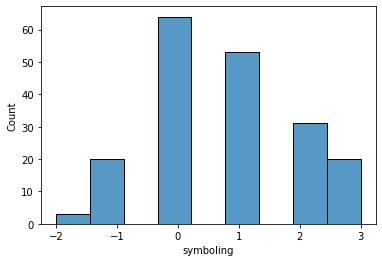

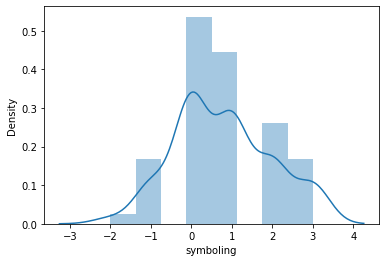

histplot : normalized-losses


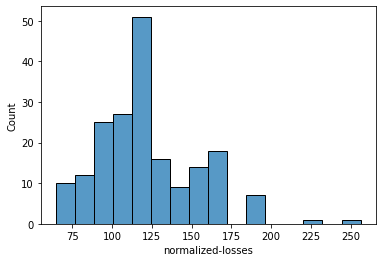

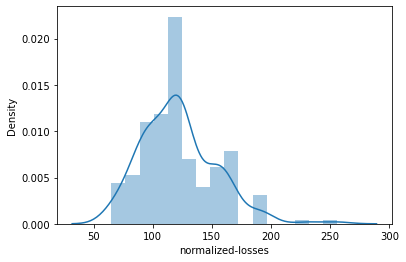

histplot : width


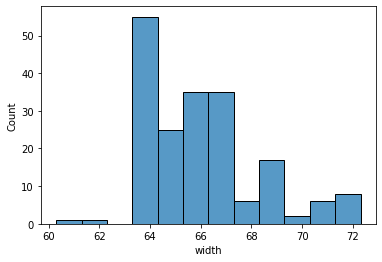

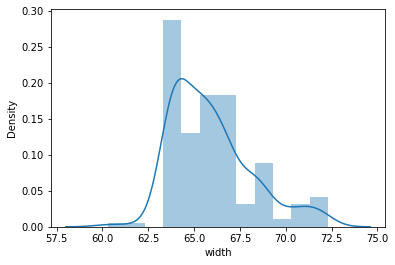

histplot : height


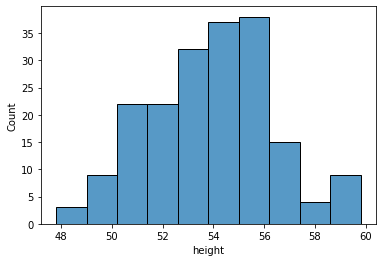

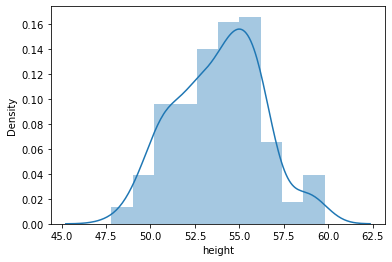

histplot : engine-size


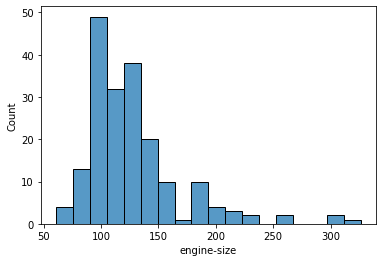

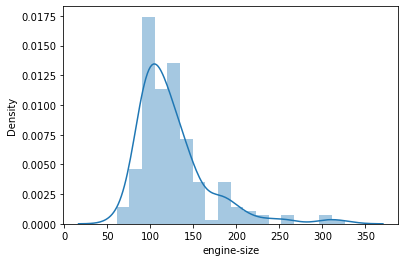

histplot : horsepower


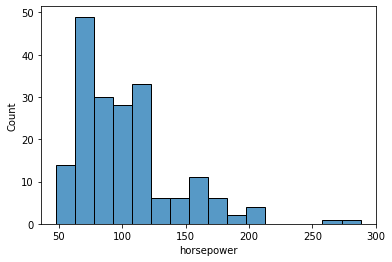

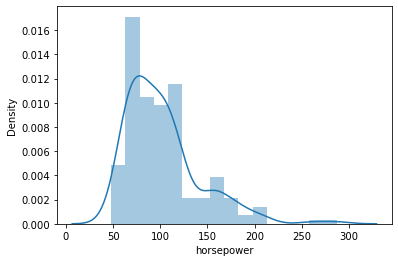

histplot : city-mpg


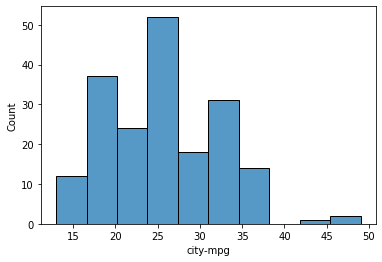

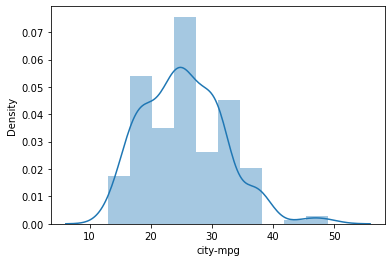

histplot : highway-mpg


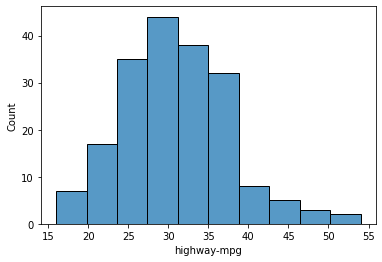

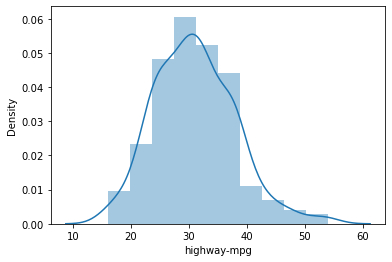

histplot : price


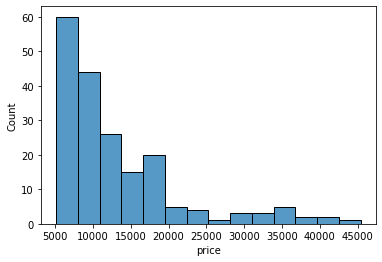

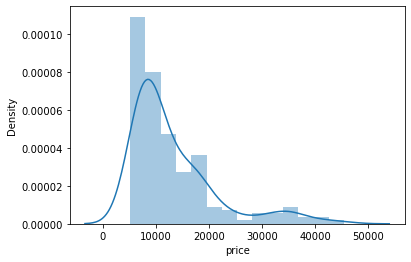

In [100]:
#To check all column histogram and distplot
for col in car_num:
    print("histplot :",col)
    sb.histplot(car_num[col])
    plt.show()
    sb.distplot(car_num[col])
    plt.show()

In [101]:
car.corr()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
symboling,1.000000,-0.232919,-0.541038,-0.105790,-0.035823,0.034606,-0.085781
width,-0.232919,1.000000,0.279210,0.735433,-0.642704,-0.677218,0.718253
height,-0.541038,0.279210,1.000000,0.067149,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.735433,0.067149,1.000000,-0.653658,-0.677470,0.852995
city-mpg,-0.035823,-0.642704,-0.048640,-0.653658,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.677218,-0.107358,-0.677470,0.971337,1.000000,-0.679048
price,-0.085781,0.718253,0.132444,0.852995,-0.654611,-0.679048,1.000000


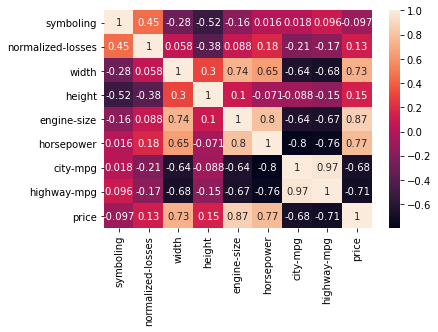

In [102]:
#Before apply transformation of skew column , first check correlation between
#each and every numerical type input with output
#In this dataset , output means target : price
sb.heatmap(car_num.corr(),annot=True)
plt.show()

In [103]:
#To check negative 
for col in car_num:
    print(col)
    print(car_num[col].unique())

symboling
[ 3  1  2  0 -1 -2]
normalized-losses
[122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 137. 101.  78.
 106.  85. 145. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125. 128.
 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.  77.
  91. 134.  65.  94. 256.  95.]
width
[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7 70.5 72.
 68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.2 68.9 68.8]
height
[48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 52.6
 54.5 58.3 53.3 54.1 53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5 58.7 54.9
 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.2 50.5 55.2 52.5
 53.  59.1 53.9 55.6 56.2 57.5]
engine-size
[130 152 109 136 131 108 164 209  61  90  98 122  92  79 110 111 119 258
 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203 132
 121 146 141 173 145]
horsepower
[111.         154.         102.         115.      

In [104]:
#Apply  sqrt() transformation on normalised-losses to reduce skewness permanently
car_num["normalized-losses"]=np.sqrt(car_num["normalized-losses"])

In [105]:
car_num["normalized-losses"].skew()

0.4045831657078237

In [106]:
#Apply log() transformation on normalised-losses to reduce skewness permanently
car_num["normalized-losses"]=np.log(car_num["normalized-losses"])

In [107]:
car_num["normalized-losses"].skew()

0.006199873119952171

# 1-12-2021

# Concate

In [108]:
#Finally we concatenate of 2 DataFrame car_num and car_cat and hold in 
#New DataFrame car_new : use concat() : inbuilt function of pandas
car_new=pd.concat([car_num,car_cat],axis=1)
car_new
#Concatenate means to join 2 or more DataFrame
#Join column wise means axis=1

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,2.402011,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,2.402011,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,2.402011,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,2.549933,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,2.549933,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,2.276938,68.9,55.5,141,114.0,23,28,16845,21,1,3,2,0,3
201,-1,2.276938,68.8,55.5,141,160.0,19,25,19045,21,1,3,2,0,3
202,-1,2.276938,68.9,55.5,173,134.0,18,23,21485,21,1,3,2,0,5
203,-1,2.276938,68.9,55.5,145,106.0,26,27,22470,21,0,3,2,0,3


In [109]:
car_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,2.402011,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,2.402011,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,2.402011,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,2.549933,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,2.549933,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [110]:
car_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          191 non-null    int64  
 1   normalized-losses  191 non-null    float64
 2   width              191 non-null    float64
 3   height             191 non-null    float64
 4   engine-size        191 non-null    int64  
 5   horsepower         191 non-null    float64
 6   city-mpg           191 non-null    int64  
 7   highway-mpg        191 non-null    int64  
 8   price              191 non-null    int64  
 9   make               191 non-null    int32  
 10  fuel-type          191 non-null    int32  
 11  body-style         191 non-null    int32  
 12  drive-wheels       191 non-null    int32  
 13  engine-location    191 non-null    int32  
 14  engine-type        191 non-null    int32  
dtypes: float64(4), int32(6), int64(5)
memory usage: 23.5 KB


# SCALING

In [111]:
#Scaling means unit of all column should be same so apply scaling on column in given Dataset
#For example:
'''N1=1000 meter here unit: meter of variable N1
N2=20 km here unit kilometer of variable of N2

1 km=1000m
20 km=1000*20=20000 m
N2=2000 m
N1>N2'''

'N1=1000 meter here unit: meter of variable N1\nN2=20 km here unit kilometer of variable of N2\n\n1 km=1000m\n20 km=1000*20=20000 m\nN2=2000 m\nN1>N2'

In [112]:
N1=1000 #unit m
N2=20 #unit km
N1>N2

True

In [113]:
N1=int(input("Enter value of N1 in meter:"))
N2=int(input("Enter value of N2 in km:"))
N2=N2*1000 #Convert value of N from km to m
#greatest of 2 no.
if N1>N2:
    print("N1 is greatest:",N1)
else:
    print("N2 is greatest:",N2)

Enter value of N1 in meter:1000
Enter value of N2 in km:20
N2 is greatest: 20000


In [114]:
#There are 2 types of method of scaling : -
#1. MinMaxScaler : Normalisation
#2. StandardScaler : standardization 
#mostly we are use standardscaler method,  why?

# MinMaxScaler

In [115]:
#1.MinMaxScaler : -
#formula of MinMaxScaler =(X-min(X))/(Max(X)-min(X))

#suppose create  1D numpy array a and b
a=np.array([10,20,30,40,50])
b=np.array([100,200,300,400,500])
print("A:")
print(a)
print("B:")
print(b)

A:
[10 20 30 40 50]
B:
[100 200 300 400 500]


In [116]:
#create user defined function for minmax scaler
def minmax(X):
    new_output=(X-X.min())/(X.max()-X.min())
    return new_output

In [117]:
#call in main program
A=minmax(a) #call function
print(A)

[0.   0.25 0.5  0.75 1.  ]


In [118]:
B=minmax(b) #call function
print(B)

[0.   0.25 0.5  0.75 1.  ]


In [119]:
'''from sklearn.preprocessing import MinMaxScaler 
#MinMaxScaler inbuilt class which define inbuilt package sklearn.preprocessing
for col in car_new:
    #create object of MinMaxScaler class
    mx=MinMaxScaler () 
    car_new[col]=mx.fit_transform(car_new[[col]]) #permanent change
    #fit_transform() inbuilt method of MinMaxScaler  class'''

'from sklearn.preprocessing import MinMaxScaler \n#MinMaxScaler inbuilt class which define inbuilt package sklearn.preprocessing\nfor col in car_new:\n    #create object of MinMaxScaler class\n    mx=MinMaxScaler () \n    car_new[col]=mx.fit_transform(car_new[[col]]) #permanent change\n    #fit_transform() inbuilt method of MinMaxScaler  class'

In [120]:
car_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,2.402011,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,2.402011,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,2.402011,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,2.549933,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,2.549933,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


# StandardScaler 

In [121]:
# 2. use 2nd method : StandardScaler 
#Standard Scaler work on Z-score formula
#formula of Z-score=(X-mean(X)/standard deviation(X))
#use this formula then value can be +ve or -ve or zero any
#means this method is best for scaling means almost use standardization means
#standard scaler method

In [122]:
#for eg. standardscaler 
#suppose create  1D numpy array a and b
a=np.array([10,20,30,40,50])
b=np.array([100,200,300,400,500])
print(a)
print(b)

[10 20 30 40 50]
[100 200 300 400 500]


In [123]:
#create user defined function for standardscaler
def standardscaler(X):
    new_output=(X-X.min())/X.std()
    return new_output

In [124]:
#Main program
#call function
a=standardscaler(A)
print(a)

[0.         0.70710678 1.41421356 2.12132034 2.82842712]


In [125]:
b=standardscaler(b)
print(b)

[0.         0.70710678 1.41421356 2.12132034 2.82842712]


In [126]:
#Apply standardscaler on whole dataset car_new
from sklearn.preprocessing import StandardScaler
#Standardscaler inbuilt class which define in sklearn.preprocessing

In [127]:
for col in car_new:
    #create object of standardscaler class
    ss=StandardScaler()
    #fit_transform() inbuilt method of standardscaler class
    car_new[col]=ss.fit_transform(car_new[[col]])

In [128]:
car_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.857613,0.137829,-0.826486,-2.073196,0.103548,0.220798,-0.676483,-0.581405,0.046389,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072
1,1.857613,0.137829,-0.826486,-2.073196,0.103548,0.220798,-0.676483,-0.581405,0.416814,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072
2,0.184009,0.137829,-0.186271,-0.596575,0.625260,1.312895,-0.981219,-0.726376,0.416814,-1.945079,0.341993,-0.744365,1.219274,-0.126323,1.927419
3,1.020811,1.303434,0.133837,0.182752,-0.394450,-0.007780,-0.219378,-0.146490,0.102476,-1.785837,0.341993,0.430625,-0.572121,-0.126323,-0.078777
4,1.020811,1.303434,0.225296,0.182752,0.245833,0.322388,-1.133588,-1.306263,0.533920,-1.785837,0.341993,0.430625,-2.363516,-0.126323,-0.078777


# Feature Enginnering

In [129]:
#Feature engineering:-means adding new columns according to reqiurement
#In existing dataset
car_new['Area']=car_new['width']*car_new['height']#multiply of width and height we can create new 
                                                                #column(feature engineering)

In [130]:
car_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,Area
0,1.857613,0.137829,-0.826486,-2.073196,0.103548,0.220798,-0.676483,-0.581405,0.046389,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072,1.713467
1,1.857613,0.137829,-0.826486,-2.073196,0.103548,0.220798,-0.676483,-0.581405,0.416814,-1.945079,0.341993,-3.094345,1.219274,-0.126323,-3.088072,1.713467
2,0.184009,0.137829,-0.186271,-0.596575,0.625260,1.312895,-0.981219,-0.726376,0.416814,-1.945079,0.341993,-0.744365,1.219274,-0.126323,1.927419,0.111124
3,1.020811,1.303434,0.133837,0.182752,-0.394450,-0.007780,-0.219378,-0.146490,0.102476,-1.785837,0.341993,0.430625,-0.572121,-0.126323,-0.078777,0.024459
4,1.020811,1.303434,0.225296,0.182752,0.245833,0.322388,-1.133588,-1.306263,0.533920,-1.785837,0.341993,0.430625,-2.363516,-0.126323,-0.078777,0.041173
